In [40]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('powerlifting.csv')

In [4]:
df.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


In [5]:
# convert column names to lowercase 
df.columns = [col.lower() for col in df.columns]
# take initial look for missing values, dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   meetid          386414 non-null  int64  
 1   name            386414 non-null  object 
 2   sex             386414 non-null  object 
 3   equipment       386414 non-null  object 
 4   age             147147 non-null  float64
 5   division        370571 non-null  object 
 6   bodyweightkg    384012 non-null  float64
 7   weightclasskg   382602 non-null  object 
 8   squat4kg        1243 non-null    float64
 9   bestsquatkg     298071 non-null  float64
 10  bench4kg        1962 non-null    float64
 11  bestbenchkg     356364 non-null  float64
 12  deadlift4kg     2800 non-null    float64
 13  bestdeadliftkg  317847 non-null  float64
 14  totalkg         363237 non-null  float64
 15  place           385322 non-null  object 
 16  wilks           362194 non-null  float64
dtypes: float64

In [6]:
# for this analysis we'll only be looking at unequipped male lifters
raw = df.loc[df['equipment']=='Raw']
raw_m = raw.loc[df['sex']=='M']

raw_m.head()

,meetid,name,sex,equipment,age,division,bodyweightkg,weightclasskg,squat4kg,bestsquatkg,bench4kg,bestbenchkg,deadlift4kg,bestdeadliftkg,totalkg,place,wilks
23,0,Kevin Gingerich,M,Raw,32.0,Open Junior,71.94,75,NaN,154.22,NaN,115.67,NaN,183.70,453.59,2,333.01
24,0,Juan Bollo,M,Raw,20.0,Open Junior,70.67,75,NaN,163.29,NaN,111.13,NaN,204.12,478.54,1,356.03
26,0,James McManus,M,Raw,36.0,Open Junior,74.93,75,NaN,NaN,NaN,115.67,NaN,156.49,272.16,1,194.06
28,0,Justin Monk,M,Raw,22.0,Open Junior,79.65,82.5,NaN,161.03,NaN,127.01,NaN,197.31,485.35,2,332.27
29,0,Kevin Londe,M,Raw,23.0,Open Junior,80.10,82.5,NaN,190.51,NaN,120.20,NaN,231.33,542.04,1,369.76


In [7]:
# take a look at missing values for our refined dataset
raw_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128650 entries, 23 to 385652
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   meetid          128650 non-null  int64  
 1   name            128650 non-null  object 
 2   sex             128650 non-null  object 
 3   equipment       128650 non-null  object 
 4   age             67546 non-null   float64
 5   division        122712 non-null  object 
 6   bodyweightkg    128433 non-null  float64
 7   weightclasskg   128031 non-null  object 
 8   squat4kg        236 non-null     float64
 9   bestsquatkg     90140 non-null   float64
 10  bench4kg        809 non-null     float64
 11  bestbenchkg     118713 non-null  float64
 12  deadlift4kg     838 non-null     float64
 13  bestdeadliftkg  104081 non-null  float64
 14  totalkg         123934 non-null  float64
 15  place           128067 non-null  object 
 16  wilks           123755 non-null  float64
dtypes: float6

In [8]:
# drop all rows missing best deadlift data
raw_m = raw_m[raw_m['bestdeadliftkg'].notna()]

In [9]:
# drop the columns that aren't adding much information
drops = ['meetid', 'name', 'age', 'squat4kg', 'bench4kg', 'deadlift4kg', 'place']
raw_m = raw_m.drop(drops, 1)
raw_m = raw_m.reset_index()

<ipython-input-9-8ae6d0edc36c>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  raw_m = raw_m.drop(drops, 1)


In [101]:
raw_m.head()

,index,sex,equipment,division,bodyweightkg,weightclasskg,bestsquatkg,bestbenchkg,bestdeadliftkg,totalkg,wilks
0,23,M,Raw,Open Junior,71.94,75,154.22,115.67,183.70,453.59,333.01
1,24,M,Raw,Open Junior,70.67,75,163.29,111.13,204.12,478.54,356.03
2,26,M,Raw,Open Junior,74.93,75,NaN,115.67,156.49,272.16,194.06
3,28,M,Raw,Open Junior,79.65,82.5,161.03,127.01,197.31,485.35,332.27
4,29,M,Raw,Open Junior,80.10,82.5,190.51,120.20,231.33,542.04,369.76


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='bodyweightkg', ylabel='totalkg'>

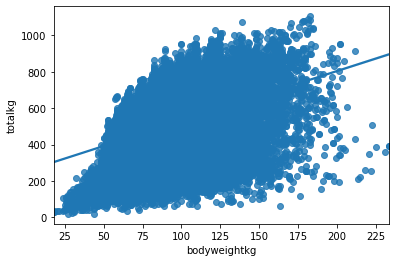

In [15]:
sns.regplot(data=raw_m, x='bodyweightkg', y='totalkg')

<AxesSubplot:xlabel='bestdeadliftkg', ylabel='totalkg'>

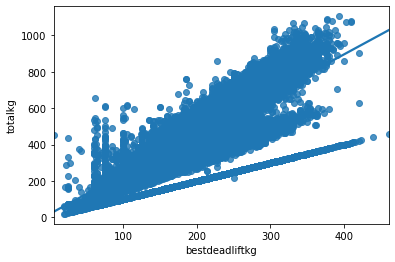

In [17]:
sns.regplot(data=raw_m, x='bestdeadliftkg', y='totalkg')

<AxesSubplot:xlabel='totalkg', ylabel='Count'>

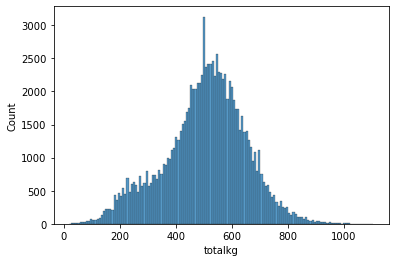

In [18]:
# quick check of distribution for target variable
sns.histplot(raw_m, x='totalkg')

In [19]:
# import linear regression dependencies
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [20]:
# isolate predictor variables we're interested in
df = raw_m[['bodyweightkg', 'bestdeadliftkg', 'totalkg']]
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101963 entries, 0 to 104080
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   bodyweightkg    101963 non-null  float64
 1   bestdeadliftkg  101963 non-null  float64
 2   totalkg         101963 non-null  float64
dtypes: float64(3)
memory usage: 3.1 MB


In [24]:
# separate dependent and independent variables
x = df[['bodyweightkg', 'bestdeadliftkg']]
y = df['totalkg']

# split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

# initialize model
linear = LinearRegression()
linear.fit(x_train, y_train)

# get predictions
y_pred = linear.predict(x_test)

# predicting the accuracy score
score = r2_score(y_test,y_pred)
score

0.5009058262128401

In [25]:
# run linear regression with bodyweight as sole predictor
x = df['bodyweightkg']
y = df['totalkg']
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

linear = LinearRegression()
linear.fit(x_train, y_train)

y_pred = linear.predict(x_test)
score = r2_score(y_test, y_pred)
score

0.1444383749687067

In [27]:
# run linear regression with best deadlift as sole predictor
x = df['bestdeadliftkg']
y = df['totalkg']
x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

linear = LinearRegression()
linear.fit(x_train, y_train)

y_pred = linear.predict(x_test)
score = r2_score(y_test, y_pred)
score

0.4994174842449608

In [41]:
# separate dependent and independent variables
x = df[['bodyweightkg', 'bestdeadliftkg']]
y = df['totalkg']

# split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

# initialize model
linear = LinearRegression()
linear.fit(x_train, y_train)

pred = np.array([70.3, 165.56]).reshape(1, -1)
linear.predict(pred)

array([378.8309521])